# <font color = lightcoral>Inference Data Prep
>    

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 4 Key Files

In [2]:
import pandas as pd
import time

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

################################## Part 1: Parsed Raw File ###################################

print("\n" + "*"*100)
print("********************** Part1 1: Parsed Raw File ******************************************")
print("*"*100 + "\n")

parsed_file =  f"{data_dir}/BGL.log_structured.csv"
parsed_file_df = pd.read_csv(parsed_file)
display(parsed_file_df.head())
print("Shape of Parsed Raw File:", parsed_file_df.shape)

######################### Part 2: Encoded File with Feature for Model Training  ######################

print("\n" + "*"*100)
print("********************** Part 2:  Input Data with Features ******************************************")
print("*"*100 + "\n")

encoded_feature_input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
display(encoded_feature_input_file_df.iloc[:, :20].head())
print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Event_ID to Template Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 3: Event_ID to Template Mapping ******************************************")
print("*"*100 + "\n")

eventid_template_file = f"{data_dir}/20240711_Template_to_EventID_Mapping_v1.00.csv"
eventid_template_df = pd.read_csv(eventid_template_file)
display(eventid_template_df.head())
print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# ######################### Part 4: Event_ID to Encoding Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 4:  Event_ID to Encoding Mapping ******************************************")
print("*"*100 + "\n")

eventid_encoding_file = f"{data_dir}/20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
eventid_encoding_df = pd.read_csv(eventid_encoding_file)
display(eventid_encoding_df.head())
print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)


****************************************************************************************************
********************** Part1 1: Parsed Raw File ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected


Shape of Parsed Raw File: (4713493, 13)

****************************************************************************************************
********************** Part 2:  Input Data with Features ******************************************
****************************************************************************************************



,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2
4,2005-06-03 16:00:00,4,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228
5,2005-06-03 16:05:00,5,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987
6,2005-06-03 16:10:00,6,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430
7,2005-06-03 16:15:00,7,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987
8,2005-06-03 16:25:00,9,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504


Shape of Encoded File with Features: (14537, 35451)

****************************************************************************************************
********************** Part 3: Event_ID to Template Mapping ******************************************
****************************************************************************************************



,EventId,EventTemplate,Occurrences
0,3aa50e45,instruction cache parity error corrected,105924
1,b9250ad9,MidplaneSwitchController performing bit sparing on R<*>-M<*>-L<*>-U<*>-C bit <*>,964
2,fc5f0940,generating core.<*>,1706751
3,1840cbfe,"<*> ddr errors(s) detected and corrected on rank <*>, symbol <*>, bit <*>",33939
4,828a502b,<*> <*> <*> error(s) (dcr <*>) detected and corrected,5040


Shape of Event_ID to Template Mapping: (1000, 3)

****************************************************************************************************
********************** Part 4:  Event_ID to Encoding Mapping ******************************************
****************************************************************************************************



,EventId,EncodedValue
0,0025df56,0
1,0045c3a8,1
2,004a68ba,2
3,00980b01,3
4,00d49120,4


Shape of Event_ID to Encoding Mapping: (1000, 2)


---

# <font color = blue> Part 1. Generate and Save the Test File

In [3]:
# import os
# import pandas as pd
# import numpy as np
# import random
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from datetime import datetime

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
# output_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'

# # Generate timestamp and serial number
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# serial_number = "0001"  # You can increment this for each run
# file_prefix = f"{timestamp}_non_overlap_full_test"

# # Required parameters
# max_events = 40
# input_length = 20
# gap = 2
# prediction_period = 1
# test_size = 0.2
# shuffle = False
# random_seed = 42

# # Set random seed for reproducibility
# np.random.seed(random_seed)
# random.seed(random_seed)

# # Data Preprocessing
# df = pd.read_parquet(input_file)

# selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy', 
#                     'hour_of_day', 'day_of_week', 'event_count', 'top_event_frequency', 'prev_event_count', 
#                     'transition_rate', 'high_transition_rate', 'prev_entropy', 'entropy_change', 
#                     'rolling_event_count', 'rolling_unique_event_count']
# event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

# df[event_id_columns].replace(-1, 0, inplace=True)

# scaler = StandardScaler()
# numerical_features = ['unique_events', 'transitions', 'entropy', 'hour_of_day', 'day_of_week', 'event_count', 
#                       'top_event_frequency', 'prev_event_count', 'transition_rate', 'prev_entropy', 
#                       'entropy_change', 'rolling_event_count', 'rolling_unique_event_count']
# df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

# label_encoder = LabelEncoder()
# df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

# pca = PCA(n_components=max_events)
# event_id_pca = pca.fit_transform(df[event_id_columns])
# event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

# df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

# def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=2, prediction_period=1):
#     sequences = []
#     targets = []
    
#     start_idx = 0
#     total_length = len(data)
#     while start_idx + input_length + gap + prediction_period <= total_length:
#         end_idx = start_idx + input_length
#         sequence = data[feature_cols].iloc[start_idx:end_idx].values
#         target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
#         sequences.append(sequence)
#         targets.append(target)
#         start_idx = end_idx + gap + prediction_period
    
#     return np.array(sequences), np.array(targets)

# feature_cols = [col for col in df_reduced.columns if col != 'Class']
# target_col = 'Class'

# X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

# _, X_test, _, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

# # Save the test data
# np.save(f"{output_dir}/{file_prefix}_X_test.npy", X_test)
# np.save(f"{output_dir}/{file_prefix}_y_test.npy", y_test)

# print(f"Test data saved to {output_dir}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")
# print(f"File prefix: {file_prefix}")

---

## <font color = tomato> Part 1.1 Recreate Train/Test File for recon of sequences only

In [4]:
import os
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from datetime import datetime

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
output_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_Match_Sequence_Test_Recon'

# Generate timestamp and serial number
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
serial_number = "0001"  # You can increment this for each run
file_prefix = f"{timestamp}_non_overlap_full_test"

# Required parameters
max_events = 40
input_length = 20
gap = 2
prediction_period = 1
test_size = 0.2
shuffle = False
random_seed = 42

# Set random seed for reproducibility
np.random.seed(random_seed)
random.seed(random_seed)

# Data Preprocessing
df = pd.read_parquet(input_file)

selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy', 
                    'hour_of_day', 'day_of_week', 'event_count', 'top_event_frequency', 'prev_event_count', 
                    'transition_rate', 'high_transition_rate', 'prev_entropy', 'entropy_change', 
                    'rolling_event_count', 'rolling_unique_event_count']
event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

df[event_id_columns].replace(-1, 0, inplace=True)

scaler = StandardScaler()
numerical_features = ['unique_events', 'transitions', 'entropy', 'hour_of_day', 'day_of_week', 'event_count', 
                      'top_event_frequency', 'prev_event_count', 'transition_rate', 'prev_entropy', 
                      'entropy_change', 'rolling_event_count', 'rolling_unique_event_count']
df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

label_encoder = LabelEncoder()
df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

pca = PCA(n_components=max_events)
event_id_pca = pca.fit_transform(df[event_id_columns])
event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=2, prediction_period=1):
    sequences = []
    targets = []
    start_end_indices = []
    
    start_idx = 0
    total_length = len(data)
    while start_idx + input_length + gap + prediction_period <= total_length:
        end_idx = start_idx + input_length
        sequence = data[feature_cols].iloc[start_idx:end_idx].values
        target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
        sequences.append(sequence)
        targets.append(target)
        start_end_indices.append((start_idx, end_idx + gap + prediction_period))
        start_idx = end_idx + gap + prediction_period
    
    return np.array(sequences), np.array(targets), np.array(start_end_indices)

feature_cols = [col for col in df_reduced.columns if col != 'Class']
target_col = 'Class'

X, y, indices = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X, y, indices, test_size=test_size, shuffle=shuffle, random_state=random_seed
)

# Save the train data
np.save(f"{output_dir}/{file_prefix}_X_train.npy", X_train)
np.save(f"{output_dir}/{file_prefix}_y_train.npy", y_train)
np.save(f"{output_dir}/{file_prefix}_indices_train.npy", indices_train)

# Save the test data
np.save(f"{output_dir}/{file_prefix}_X_test.npy", X_test)
np.save(f"{output_dir}/{file_prefix}_y_test.npy", y_test)
np.save(f"{output_dir}/{file_prefix}_indices_test.npy", indices_test)

print(f"Train and test data saved to {output_dir}")

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"File prefix: {file_prefix}")

# Load and display a sample from the saved train and test data
X_train_sample = np.load(f"{output_dir}/{file_prefix}_X_train.npy")
y_train_sample = np.load(f"{output_dir}/{file_prefix}_y_train.npy")
indices_train_sample = np.load(f"{output_dir}/{file_prefix}_indices_train.npy")

X_test_sample = np.load(f"{output_dir}/{file_prefix}_X_test.npy")
y_test_sample = np.load(f"{output_dir}/{file_prefix}_y_test.npy")
indices_test_sample = np.load(f"{output_dir}/{file_prefix}_indices_test.npy")

print("Sample data from X_train:")
print(X_train_sample[:1])

print("Sample data from y_train:")
print(y_train_sample[:10])

print("Sample indices from training set:")
print(indices_train_sample[:10])

print("Sample data from X_test:")
print(X_test_sample[:1])

print("Sample data from y_test:")
print(y_test_sample[:10])

print("Sample indices from test set:")
print(indices_test_sample[:10])

print("Min and Max sequence indices for training set:")
print("Min:", indices_train_sample.min(), "Max:", indices_train_sample.max())

print("Min and Max sequence indices for test set:")
print("Min:", indices_test_sample.min(), "Max:", indices_test_sample.max())

# Print the shape of the original file
encoded_feature_input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
display(encoded_feature_input_file_df.iloc[:, :20].head())
print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

Train and test data saved to /home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_Match_Sequence_Test_Recon
X_train shape: (505, 20, 56)
y_train shape: (505,)
X_test shape: (127, 20, 56)
y_test shape: (127,)
File prefix: 20240714_221127_non_overlap_full_test
Sample data from X_train:
[[[ 4.00000000e+00  4.16888954e-01  4.90000000e+01 ... -1.53296629e+02
   -1.72384610e+02  6.73044307e+01]
  [ 5.00000000e+00 -2.07950176e-01  1.69000000e+02 ...  1.61375315e+02
    2.29718942e+02  8.70463488e+01]
  [ 6.00000000e+00  4.16888954e-01  8.00000000e+01 ...  2.02481490e+01
    3.49018957e+01  4.92429082e+01]
  ...
  [ 3.00000000e+01 -3.64159959e-01  1.35000000e+02 ... -1.56895977e+02
   -2.48404381e+02 -1.34980763e+02]
  [ 3.20000000e+01  2.60679172e-01  8.00000000e+01 ...  2.09232204e+02
    2.54553534e+02 -6.90262277e+01]
  [ 3.80000000e+01  2.60679172e-01  8.00000000e+01 ... -1.80357489e+00
   -3.50372973e+01 -1.20884282e+02]]]
Sample data from y_train:
[0. 0. 0. 1. 0. 0

,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2
4,2005-06-03 16:00:00,4,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228
5,2005-06-03 16:05:00,5,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987
6,2005-06-03 16:10:00,6,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430
7,2005-06-03 16:15:00,7,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987
8,2005-06-03 16:25:00,9,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504


Shape of Encoded File with Features: (14537, 35451)


___
### <font color = orange> Create Files for Recon

> 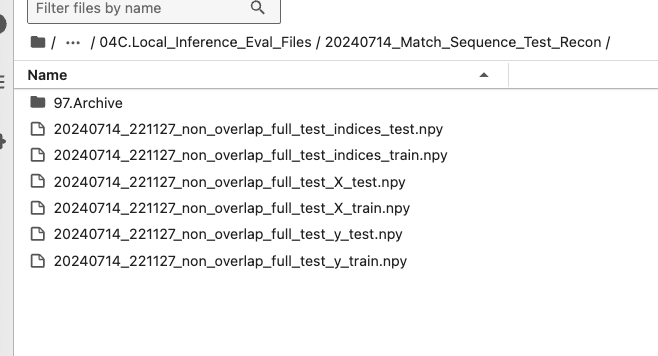

### <font color = red> Compare Original Test and Recon Test Files Created above

In [7]:
import numpy as np

# Load original test files
original_X_test_path = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_062624_non_overlap_full_test_X_test.npy'
original_y_test_path = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_062624_non_overlap_full_test_y_test.npy'

original_X_test = np.load(original_X_test_path)
original_y_test = np.load(original_y_test_path)

# Load new test files
new_X_test_path = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_Match_Sequence_Test_Recon/20240714_221127_non_overlap_full_test_X_test.npy'
new_y_test_path = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_Match_Sequence_Test_Recon/20240714_221127_non_overlap_full_test_y_test.npy'

new_X_test = np.load(new_X_test_path)
new_y_test = np.load(new_y_test_path)

# Display shapes
print("Original X_test shape:", original_X_test.shape)
print("Original y_test shape:", original_y_test.shape)

print("New X_test shape:", new_X_test.shape)
print("New y_test shape:", new_y_test.shape)

# Display a few records for comparison
print("Original X_test sample:")
print(original_X_test[:2])

print("Original y_test sample:")
print(original_y_test[:10])

print("New X_test sample:")
print(new_X_test[:2])

print("New y_test sample:")
print(new_y_test[:10])


Original X_test shape: (127, 20, 56)
Original y_test shape: (127,)
New X_test shape: (127, 20, 56)
New y_test shape: (127,)
Original X_test sample:
[[[ 4.55100000e+04 -3.64159959e-01  1.10000000e+01 ... -6.03386704e+01
   -7.63430651e+01  2.76562845e+01]
  [ 4.55140000e+04  1.04469389e-01  8.00000000e+01 ... -1.03639051e+02
   -1.36116477e+02  1.60575016e+01]
  [ 4.55190000e+04 -3.64159959e-01  4.10000000e+01 ... -6.49000767e+01
   -1.05809419e+02 -6.46902538e+01]
  ...
  [ 4.55720000e+04  4.16888954e-01  8.00000000e+01 ... -3.95672762e+01
   -1.02867421e+02 -1.92895632e+02]
  [ 4.55780000e+04 -3.64159959e-01  1.68000000e+02 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]
  [ 4.55800000e+04 -3.64159959e-01  5.00000000e+01 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]]

 [[ 4.55920000e+04 -3.64159959e-01  5.00000000e+01 ...  2.41506060e+02
    2.91421308e+02 -5.57249175e+01]
  [ 4.56030000e+04 -3.64159959e-01  5.00000000e+01 ...  2.60404889e+02
    3.66422948e+02  1.13

In [8]:
import numpy as np

# Load original test files
original_X_test_path = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_062624_non_overlap_full_test_X_test.npy'
original_y_test_path = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_062624_non_overlap_full_test_y_test.npy'

original_X_test = np.load(original_X_test_path)
original_y_test = np.load(original_y_test_path)

# Load new test files
new_X_test_path = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_Match_Sequence_Test_Recon/20240714_221127_non_overlap_full_test_X_test.npy'
new_y_test_path = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240714_Match_Sequence_Test_Recon/20240714_221127_non_overlap_full_test_y_test.npy'

new_X_test = np.load(new_X_test_path)
new_y_test = np.load(new_y_test_path)

# Check for discrepancies
def check_discrepancies(original, new, name):
    if np.array_equal(original, new):
        print(f"No discrepancies found in {name}.")
    else:
        print(f"Discrepancies found in {name}.")
        differences = np.where(original != new)
        print(f"Differences at indices: {differences}")
        print(f"Original {name} values at differences: {original[differences]}")
        print(f"New {name} values at differences: {new[differences]}")

# Check discrepancies for X_test and y_test
check_discrepancies(original_X_test, new_X_test, "X_test")
check_discrepancies(original_y_test, new_y_test, "y_test")


No discrepancies found in X_test.
No discrepancies found in y_test.


___
# <font color = blue> Part 2. Run Inference for Multiple Records with Flask App

In [6]:
# import requests
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# # Load your test data
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'
# file_prefix = "20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # Prepare the data for the request
# data = {'X_test': X_test.tolist()}

# # Send a request to the server
# response = requests.post('http://0.0.0.0:5000/predict', json=data)

# # Process the response
# predictions = np.array(response.json()['predictions'])

# # Print first 10 predictions and actual labels
# print("First 10 predictions:", predictions[:10])
# print("First 10 actual labels:", y_test[:10])

# # Print the records with predicted and actual labels
# results_df = pd.DataFrame({
#     'Record': range(len(predictions)),
#     'Predicted Label': predictions.flatten(),
#     'Actual Label': y_test.flatten()
# })

# print(f"Results for all records:")
# print(results_df)

# # Calculate metrics
# conf_matrix = confusion_matrix(y_test, predictions)
# precision = precision_score(y_test, predictions, zero_division=0)
# recall = recall_score(y_test, predictions, zero_division=0)
# accuracy = accuracy_score(y_test, predictions)
# f1 = f1_score(y_test, predictions, zero_division=0)
# tn, fp, fn, tp = conf_matrix.ravel()

# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#     'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
# })

# print("==================================================")
# print("Metrics:")
# print(metrics_df)

# # Plot the confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()